# YYK Model
## S-P pol coupled cavity
## Configuration PRMI
### With S-to-P TRANS map
### without any phase maps

In [51]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [52]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

## PRMI Base

In [59]:
base = finesse.kat()
base.verbose=False
base.parse("""
#------- Main PRMI ---------------------------
#---------------------------------------------

# clight 299792458.0 

l i1 83.74 0  nL                  #I0=780W
const fmod1 16.880962M            #f1
const fmod2 45.0159M              #f2
const fmod3 56.2699M              #f3
const PRMtune -13

mod eo1 $fmod1 0.1 1 pm 0 nL neo1
s seo1 0 neo1 neo2
mod eo2 $fmod2 0.1 1 pm 0 neo2 neo3
s seo2 0 neo3 neo4
mod eo3 $fmod3 0.05 1 am 0 neo4 neo5

s eo1refl 0 neo5 neo22
bs refl 0.0001 0.9999 0 45 neo22 dump npr nREFL   #REFL
s bsm 0 npr nprb

m prm 0.90 0.10 $PRMtune nprb nf0

s Ls1 14.7615 nf0 nf1 #14.7615 
bs PR2 0.9999 0.0001 0 0.6860 nf1 nf2 dump dump # tilted
s Ls2 11.0661 nf2 nf3
bs PR3 1 0 0 0.6860 nf3 nf4 dump dump # tilted
s Ls3 15.7638 nf4 n1

bs bs1 0.5 0.5 0 45 n1 n2 n3hr n4hr   #==BS==#

s bs1bsAR1 0 n3hr n3hr2
m bsAR1 0 1 0 n3hr2 n3ar
s subBS1 0.0 1.45 n3ar n3ar2 # BS thickness is ignored 
m bsAR3 0 1 0 n3ar2 n3
s bs1bsAR2 0 n4hr n4hr2
m bsAR2 0 1 0 n4hr2 n4ar
s subBS2 0.0 1.45 n4ar n4ar2 # BS thickness is ignored 
m bsAR4 0 1 0 n4ar2 n4

s Lmx 26.6649  n3 n6
s Lmy 23.3351  n2 n5

bs ARx 200e-6 0.9998 0 0.025 n6 nPOX n6ar dump   # wedged ITM
bs ARy 200e-6 0.9998 0 0.025 n5 dump n5ar dump   # wedged ITM

s subx 0.15 1.754 n6ar n6hr  # thickness 150mm
s suby 0.15 1.754 n5ar n5hr  # thickness 150mm

m ITMx 0.996 4000e-6 90 n6hr n6hrp1
m ITMy 0.996 4000e-6 0 n5hr n5hrp1



#----------- P-pol Cavity Part ---------------
#---------------------------------------------

s spy1 0 n5hrp1 p1y
lens compy 2519.89 p1y p2y
s spy2 0 p2y p3y
lens ly0 -541.619156 p3y p4y
s py3 0.0855 p4y p5y
bs Lmyp 1 0 0 45 p5y p6y dump dump
s py4 23.5127 p6y p4


s spx1 0 n6hrp1 p1x
lens compx 2519.89 p1x p2x
s spx2 0 p2x p3x
lens lx0 -541.619156 p3x p4x
s px3 0.0855 p4x p5x
bs Lmxp 1 0 0 45 p5x p6x dump dump
s px4 26.8425 p6x p3

bs bsp 0.5 0.5 0 45 p4 dump p6 p3

s Lp3 15.7638 p6 nf4p
bs PR3p 1 0 0 0.6860 nf4p nf3p dump dump
s Lp2 11.0661 nf3p nf2p
bs PR2p 0.9999 0.0001 0 0.6860 nf2p nf1p nPOPp dump
s Lp1 14.7615 nf1p nf0p
m prmp 0.9 0.1 $PRMtune nf0p nREFLp



#----------- Gaussian params -----------------
#---------------------------------------------


gauss input i1 nL 4.3330624e-3 6.809459 4.4088792e-3 7.3067531


attr prm Rc -458.1285
attr PR2 Rc -3.0764
attr PR3 Rc 24.9165

attr ARx Rc 0
attr ARy Rc 0
attr ITMx Rcx -1900
attr ITMx Rcy -1900
attr ITMy Rcx -1900
attr ITMy Rcy -1900


attr PR3p Rc 24.9165
attr PR2p Rc -3.0764
attr prmp Rc 458.1285


cav cav_sx prm nf0 ITMx n6hr
cav cav_px ITMx n6hrp1 prmp nf0p
cav cav_sy prm nf0 ITMy n5hr
cav cav_py ITMy n5hrp1 prmp nf0p


#----------- Mirror Map (ITMs) ---------------
#---------------------------------------------
map ITMy ITMY_Rmap.txt
map ITMx ITMX_Rmap.txt

knm ITMx ITMX_Rmap2
conf ITMx save_knm_binary 1
conf ITMx interpolation_method 2
conf ITMx integration_method 3

knm ITMy ITMY_Rmap2
conf ITMy save_knm_binary 1
conf ITMy interpolation_method 2
conf ITMy integration_method 3

#---------------- Detectors ------------------
#---------------------------------------------

ad CR0 0 nf0
ad SB1 $fmod1 nf0
ad SB2 $fmod2 nf0
ad SB3 $fmod3 nf0
ad CR0p 0 nf0p
ad SB1p $fmod1 nf0p
pd1 detectorI $fmod1 0 nprb
pd1 detectorQ $fmod1 90 nprb
pd1 detectorIp $fmod1 0 nREFLp
pd1 detectorQp $fmod1 90 nREFLp


""")

## PRMI BASE check
### Sideband lock

<function matplotlib.pyplot.show>

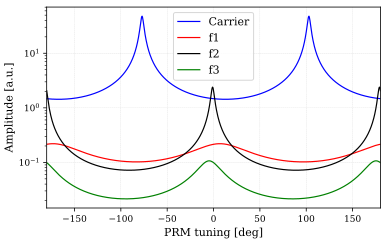

In [62]:
kat=base.deepcopy()
kat.parse("""
xaxis* prm phi lin -180 180 1000
cav cav0 prm nf0 ITMx n6hr
maxtem 1
phase 2""")

out = kat.run()
plt.semilogy(out.x, out["CR0"],label="Carrier")
plt.semilogy(out.x, out["SB1"],label="f1")
plt.semilogy(out.x, out["SB2"],label="f2")
plt.semilogy(out.x, out["SB3"],label="f3")
plt.xlabel("PRM tuning [deg]")
plt.ylabel("Amplitude [a.u.]")
plt.legend(loc=0)
plt.show

## Mode of P cav (inside PRC_P)

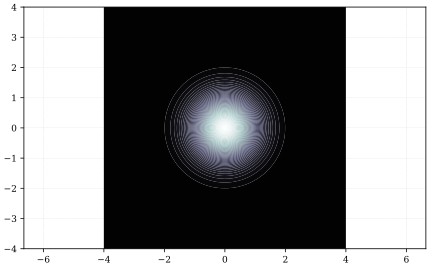

In [61]:
kat2 = base.deepcopy()
kat2.parse("""
maxtem 8
phase 2
beam beam1 0 nf0p
xaxis beam1 x lin -4 4 100
x2axis beam1 y lin -4 4 100
""")

out1 = kat2.run()

beam_plot(out1)


## POP_P

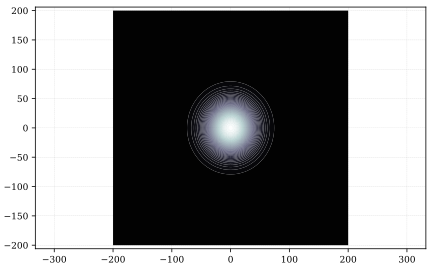

In [63]:
kat3 = base.deepcopy()
kat3.parse("""
maxtem 8
phase 2
beam beam1 0 nf2p
xaxis beam1 x lin -200 200 100
x2axis beam1 y lin -200 200 100
""")

out3 = kat3.run()

beam_plot(out3)


## Fields and Signals when max 0th order, PRM sweep

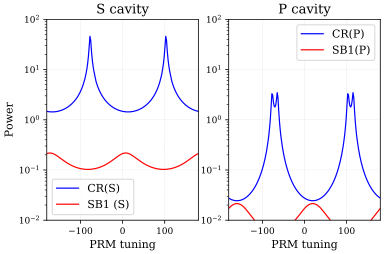

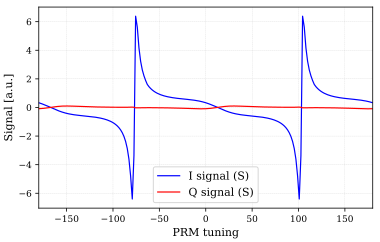

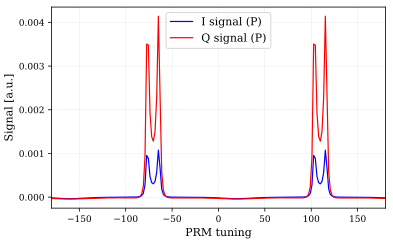

In [64]:
kat4 = base.deepcopy()
kat4.parse("""
maxtem 0
xaxis* prm phi lin -180 180 200
put* prmp phi $x1
""")

out4 = kat4.run()

result_plot(out4)

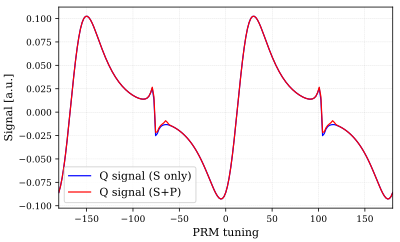

In [65]:
## Total Q signal  (Is Q signal affected?)
plt.figure(1)
#plt.plot(out1.x, out1["detectorI"]+out1["detectorIp"],label='I signal (S+P)')
plt.plot(out4.x, out4["detectorQ"],label='Q signal (S only)')
plt.plot(out4.x, out4["detectorQ"]+out4["detectorQp"],label='Q signal (S+P)')
plt.xlabel('PRM tuning')
plt.ylabel('Signal [a.u.]')
plt.legend(loc=0)

## Fields and Signals when max 8th order, PRM sweep

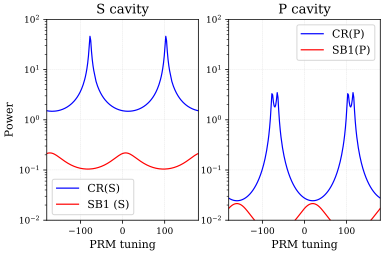

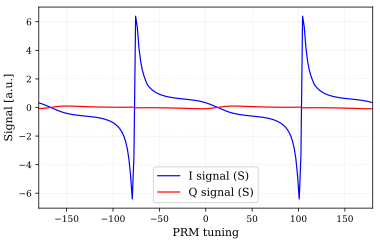

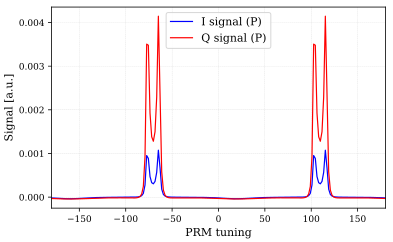

In [67]:
kat5 = base.deepcopy()
kat5.parse("""
maxtem 8
xaxis* prm phi lin -180 180 200
put* prmp phi $x1
""")

out5 = kat5.run()

result_plot(out5)

## With an angular offset (10urad) on PRM
### Signals are distorted by HOMs, and the effect from P cav is small

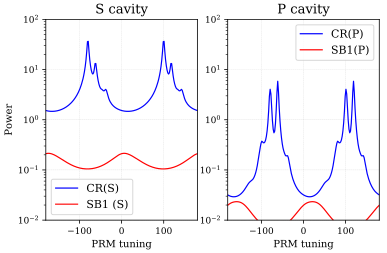

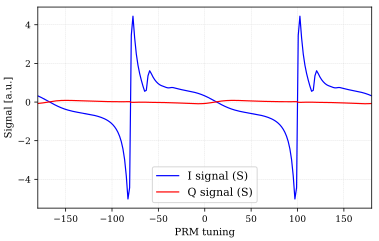

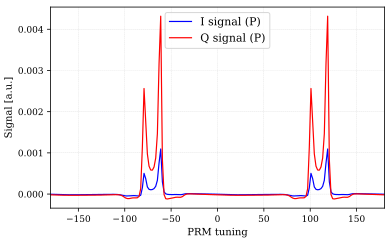

In [325]:
kat6 = base.deepcopy()
kat6.parse("""
attr prm xbeta 10e-6
attr prmp xbeta 10e-6
maxtem 8
xaxis* prm phi lin -180 180 200
put* prmp phi $x1
""")

out6 = kat6.run()

result_plot(out6)

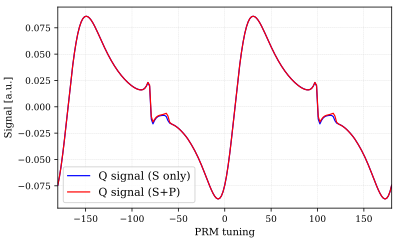

In [326]:
## Total Q signal  (Is Q signal affected?)
plt.figure(1)
#plt.plot(out1.x, out1["detectorI"]+out1["detectorIp"],label='I signal (S+P)')
plt.plot(out6.x, out6["detectorQ"],label='Q signal (S only)')
plt.plot(out6.x, out6["detectorQ"]+out6["detectorQp"],label='Q signal (S+P)')
plt.xlabel('PRM tuning')
plt.ylabel('Signal [a.u.]')
plt.legend(loc=0)

## With an angular offset (1urad) on ITMs (PIT on IX, YAW on IY
### Signals are distorted as much as PRM 10urad, and the effect from the P cavity is still small

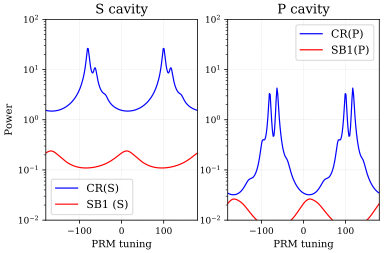

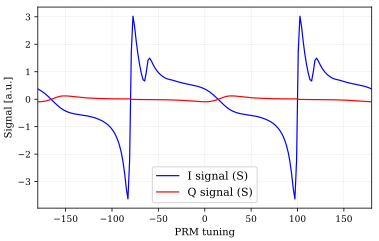

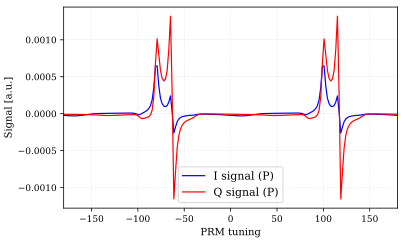

In [329]:
kat7 = base.deepcopy()
kat7.parse("""
attr ITMx ybeta 1e-6
attr ITMy xbeta 1e-6
maxtem 8
xaxis* prm phi lin -180 180 200
put* prmp phi $x1
""")

out7 = kat7.run()

result_plot(out7)

## Angular sweep of PRM
### No HOM (up to 1st order)

In [345]:
kat8 = base.deepcopy()
kat8.parse("""
pdtype detectorI x-split
pdtype detectorQ x-split
pdtype detectorIp x-split
pdtype detectorQp x-split

maxtem 1

xaxis* prm xbeta lin -100u 100u 200
put* prmp xbeta $x1
""")
out8 = kat8.run()

Text(0.5,0,'PRM YAW tuning')

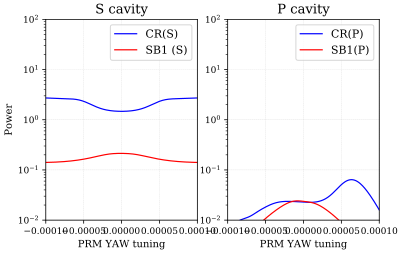

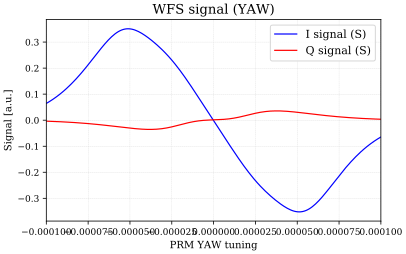

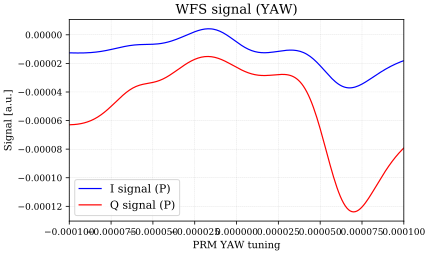

In [350]:
result_plot(out8)
plt.figure(1)
plt.subplot(1,2,1)
plt.xlabel('PRM YAW tuning')
plt.subplot(1,2,2)
plt.xlabel('PRM YAW tuning')
plt.figure(2)
plt.title('WFS signal (YAW)')
plt.xlabel('PRM YAW tuning')
plt.figure(3)
plt.title('WFS signal (YAW)')
plt.xlabel('PRM YAW tuning')

## Angular sweep of PRM
### With HOM (up to 8th order)

In [343]:
kat9 = base.deepcopy()
kat9.parse("""
pdtype detectorI x-split
pdtype detectorQ x-split
pdtype detectorIp x-split
pdtype detectorQp x-split

maxtem 8

xaxis* prm xbeta lin -100u 100u 200
put* prmp xbeta $x1
""")

out9 = kat9.run()

Text(0.5,0,'PRM YAW tuning')

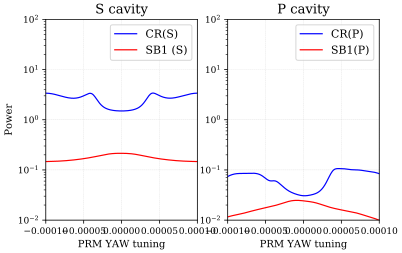

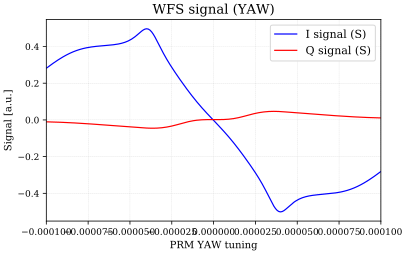

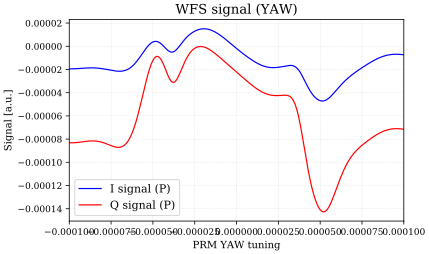

In [351]:
result_plot(out9)
plt.figure(1)
plt.subplot(1,2,1)
plt.xlabel('PRM YAW tuning')
plt.subplot(1,2,2)
plt.xlabel('PRM YAW tuning')
plt.figure(2)
plt.title('WFS signal (YAW)')
plt.xlabel('PRM YAW tuning')
plt.figure(3)
plt.title('WFS signal (YAW)')
plt.xlabel('PRM YAW tuning')

In [56]:
def result_plot(out):
 	   plt.subplot(1,2,1)
 	   plt.semilogy(out.x, out["CR0"],label='CR(S)')
 	   plt.semilogy(out.x, out["SB1"],label='SB1 (S)')
 	   plt.xlabel('PRM tuning')
 	   plt.ylabel('Power')
 	   plt.title('S cavity')
 	   plt.legend(loc=0)
 	   plt.ylim(1e-2,1e2)
#
 	   plt.subplot(1,2,2)
 	   plt.semilogy(out.x, out["CR0p"],label='CR(P)')
 	   plt.semilogy(out.x, out["SB1p"],label='SB1(P)')
 	   plt.xlabel('PRM tuning')
 	   plt.title('P cavity')
 	   plt.legend(loc=0)
	   plt.ylim(1e-2,1e2)
#
 	   plt.figure(2)
 	   plt.plot(out.x, out["detectorI"],label='I signal (S)')
 	   plt.plot(out.x, out["detectorQ"],label='Q signal (S)')
 	   plt.xlabel('PRM tuning')
 	   plt.ylabel('Signal [a.u.]')
 	   plt.legend(loc=0)
#
 	   plt.figure(3)
 	   plt.plot(out.x, out["detectorIp"],label='I signal (P)')
 	   plt.plot(out.x, out["detectorQp"],label='Q signal (P)')
 	   plt.xlabel('PRM tuning')
 	   plt.ylabel('Signal [a.u.]')
 	   plt.legend(loc=0)


def beam_plot(out):
    	   X = out.x
    	   Y = out.y
    	   X, Y = np.meshgrid(X, Y)
    	   Z = out["beam1"]
    	   fig1, ax2 = plt.subplots(constrained_layout=True)
    	   CS = ax2.contourf(X, Y, Z, 50, cmap=plt.cm.bone)
    	   ax2.set_aspect('equal', 'datalim')


In [43]:
0.01*3.14/180

0.00017444444444444446